In [13]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [19]:
train_data = datasets.FashionMNIST(
    root = "tutorial",
    train = True,
    download = True,
    transform = ToTensor()
)
train_data
train_data.data.shape
np.unique(train_data.targets, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [18]:
test_data = datasets.FashionMNIST(
    root = "tutorial",
    train = False,
    download = True,
    transform = ToTensor()
)
test_data
test_data.data.shape
np.unique(test_data.targets, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [21]:
train_dataloader = DataLoader(dataset = train_data, batch_size = 64)
test_dataloader = DataLoader(dataset = test_data, batch_size = 64)

train_dataloader.dataset
len(train_dataloader.dataset)

len(train_dataloader)

938 * 64

for batch, (x, y) in enumerate(train_dataloader):
    print(batch + 1)
    print(f"shape of x: {x.shape}")
    print(f"shape of y: {y.shape} & dtype of y: {y.dtype}")

1
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
2
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
3
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
4
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
5
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
6
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
7
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
8
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
9
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
10
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
11
shape of x: torch.Size([64

In [26]:
class NET(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features = 28*28,
            out_features = 512),
            nn.ReLU(),
            nn.Linear(in_features = 512,
            out_features = 512),
            nn.ReLU(),
            nn.Linear(in_features = 512,
            out_features = 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        network = self.linear_relu_stack(x)
        return network

simpleNN = NET()
simpleNN

NET(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [27]:
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.SGD(
    params = simpleNN.parameters(),
    lr = 1e-3
)

In [28]:
def training(dataloader, model, loss_func, optimizer):

    size = len(dataloader.dataset)

    model.train()

    for batch, (x, y) in enumerate(dataloader):

        pred = model(x)
        loss = loss_func(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()
            current = batch * len(x)
            print(f"loss: {loss:>5f} at {current:>5d}/{size:>5d}")

In [34]:
def testing(dataloader, model, loss_func):

    size = len(dataloader.dataset)
    num_batch = len(dataloader)

    model.eval()

    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            pred = model(x)

            test_loss += loss_func(pred, y).item()
            correct += (pred.argmax (1) == y).type(torch.float).sum().item()

    test_loss /= num_batch
    correct /= size

    print(f"\n test evalution: \n Accuracy: {(100*correct):>5f}%, \
        Avg loss: {test_loss:>5f}\n")


In [35]:
epochs = 5

for t in range(epochs):
    print(f"\n\n   Epoch {t+1} --------------------- \n")

    training(train_dataloader, simpleNN, loss_func, opt)
    testing(test_dataloader, simpleNN, loss_func)



   Epoch 1 --------------------- 

loss: 1.922040 at     0/60000
loss: 1.878703 at  6400/60000
loss: 1.758582 at 12800/60000
loss: 1.782992 at 19200/60000
loss: 1.700166 at 25600/60000
loss: 1.645051 at 32000/60000
loss: 1.658721 at 38400/60000
loss: 1.570832 at 44800/60000
loss: 1.589414 at 51200/60000
loss: 1.476521 at 57600/60000

 test evalution: 
 Accuracy: 60.780000%,         Avg loss: 1.501290



   Epoch 2 --------------------- 

loss: 1.581842 at     0/60000
loss: 1.535330 at  6400/60000
loss: 1.384863 at 12800/60000
loss: 1.449647 at 19200/60000
loss: 1.347384 at 25600/60000
loss: 1.336483 at 32000/60000
loss: 1.349219 at 38400/60000
loss: 1.282297 at 44800/60000
loss: 1.306491 at 51200/60000
loss: 1.212890 at 57600/60000

 test evalution: 
 Accuracy: 63.260000%,         Avg loss: 1.239380



   Epoch 3 --------------------- 

loss: 1.321491 at     0/60000
loss: 1.295970 at  6400/60000
loss: 1.130836 at 12800/60000
loss: 1.237035 at 19200/60000
loss: 1.117027 at 25600/60000

simpleNN predcit as Ankle boot : truth is Ankle boot


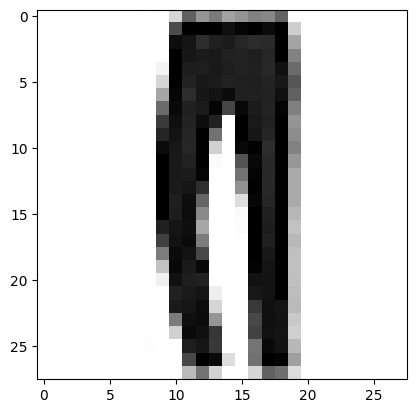

In [49]:
from operator import truth


labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dres",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

plt.imshow(test_data.data[2], cmap = "Greys")

x = test_data[0][0]

y = test_data[0][1]

with torch.no_grad():
    pred = simpleNN(x)
    prediction = labels[pred[0].argmax(0)]
    truth = labels[y]

    print(f"simpleNN predcit as {prediction} : truth is {truth}")